In [0]:
"""
author - Saqeeb and Shamim Banu



https://github.com/shubhpawar/Automated-Essay-Scoring/blob/master/automated_essay_scoring.ipynb
https://www.commonlounge.com/discussion/99e86c9c15bb4d23a30b111b23e7b7b1
https://github.com/mankadronit/Automated-Essay--Scoring/blob/master/Training%20LSTM%20Model.ipynb
https://kevinloughlin.github.io/Automated-Essay-Grading/
"""

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk



In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
!ls

drive  sample_data


In [0]:
os.chdir("/content/drive/My Drive/Essay_score")

In [5]:
!ls


Essay_scoring.py	valid_sample_submission_1_column.csv
Essay_Set_Descriptions	valid_sample_submission_1_column_no_header.csv
new_df.csv		valid_sample_submission_2_column.csv
test_set.tsv		valid_sample_submission_5_column.csv
Training_Materials	valid_set.tsv
training_set_rel3.tsv	valid_set.xls
training_set_rel3.xls	valid_set.xlsx
training_set_rel3.xlsx


In [0]:
df = pd.read_csv("training_set_rel3.tsv", delimiter = "\t",encoding='charmap')
#new_df = pd.read_csv('new_df.csv',encoding='charmap')
df = df.iloc[:,[0,1,2,6]]


In [0]:
df1.shape

In [0]:
def sent_count(x):
    essay = str(x)
    essay = essay.split(".")
    return len(essay)


df['sent_count'] = df['essay'].apply(sent_count)


In [0]:
"""
Average sentence length

"""

def av_sent_len(x):
    essay = str(x)
    word_count = len(essay.split())
    sent_count = len(essay.split("."))
    return int(word_count/sent_count)


df['av_sent_len'] = df['essay'].apply(av_sent_len)


In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
"""
Cleaning the essay

"""

def clean_essay(x):
  x = re.sub(r'@[A-Z]{2,}\d?,?\'?s? ?','',str(x))
  x = re.sub(r'[^a-zA-Z ]','',x)
  x = nltk.word_tokenize(x)
  x = " ".join(x)
  return x

df['essay'] = df['essay'].apply(clean_essay)


In [0]:

"""
Adding word count

"""

def word_count(x):
  essay = str(x)
  essay = essay.split()
  return len(essay)
    
    
df['word_count'] = df['essay'].apply(word_count)



In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:

"""
Number of distinct words in a essay

"""

from nltk.corpus import stopwords
#from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stop_word = set(stopwords.words('english'))
def uni_word_count(x):
    essay = str(x).lower()
    uniq_word = essay.split()
    uniq_word = [ps.stem(word) for word in uniq_word if not word in stop_word]
    uniq_word = list(set(essay.split()))   
    return len(uniq_word)


df['uni_word_count'] = df['essay'].apply(uni_word_count)


In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
"""
Nouns_count

"""
import nltk
#from textblob import TextBlob
#import spacy
#nlp = spacy.load('en')
#nlp1 = spacy.load('en_core_web_lg')

def noun_count(x):
    x = str(x).lower()
    x = nltk.word_tokenize(x)
    x = nltk.pos_tag(x)
    list1 = ([word for (word, pos) in x if pos[0] == 'N'])
    return len(list1)

df['noun_count'] = df['essay'].apply(noun_count)



In [0]:
"""
Verb_count

"""

def verb_count(x):
    x = str(x).lower()
    x = nltk.word_tokenize(x)
    x = nltk.pos_tag(x)
    list1 = ([word for (word, pos) in x if pos[0] == 'V'])
    return len(list1)

df['verb_count'] = df['essay'].apply(verb_count)



In [0]:
df1 = df[df['essay_set'] == 1]
df2 = df[df['essay_set'] == 2]
df3 = df[df['essay_set'] == 3]
df4 = df[df['essay_set'] == 4]
df5 = df[df['essay_set'] == 5]
df6 = df[df['essay_set'] == 6]
df7 = df[df['essay_set'] == 7]
df8 = df[df['essay_set'] == 8]


In [17]:
df1.iloc[1,:]

essay_id                                                          2
essay_set                                                         1
essay             Dear I believe that using computers will benef...
domain1_score                                                     9
sent_count                                                       19
av_sent_len                                                      22
word_count                                                      409
uni_word_count                                                  186
noun_count                                                       99
verb_count                                                       87
Name: 1, dtype: object

In [0]:
"""
Making a ndarray for training set
Features and label
Also we need to tokenize the df
"""


from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000, stop_words='english')
features = cv.fit_transform(df['essay'])
features = features.toarray()


temp = df.iloc[:,[1,4,6,7,8,9]].values
features = np.hstack((temp , features))
#import numpy
#numpy.savetxt("df.csv", features , delimiter = ",")


In [0]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
labels_1 = df1.iloc[:, [3]].values
labels_1= sc1.fit_transform(labels_1)

sc2 = StandardScaler()
labels_2 = df2.iloc[:, [3]].values
labels_2= sc2.fit_transform(labels_2)

sc3 = StandardScaler()
labels_3 = df3.iloc[:, [3]].values
labels_3= sc3.fit_transform(labels_3)

sc4 = StandardScaler()
labels_4= df4.iloc[:, [3]].values
labels_4= sc4.fit_transform(labels_4)

sc5 = StandardScaler()
labels_5 = df5.iloc[:, [3]].values
labels_5= sc5.fit_transform(labels_5)

sc6 = StandardScaler()
labels_6 = df6.iloc[:, [3]].values
labels_6= sc6.fit_transform(labels_6)

sc7 = StandardScaler()
labels_7 = df7.iloc[:, [3]].values
labels_7= sc7.fit_transform(labels_7)

sc8 = StandardScaler()
labels_8 = df8.iloc[:, [3]].values
labels_8= sc8.fit_transform(labels_8)



In [0]:
labels = np.concatenate((labels_1,labels_2,labels_3,labels_4,labels_5,labels_6,labels_7,labels_8))

In [21]:
labels.shape , features.shape

((12976, 1), (12976, 10006))

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features= [0])
features = onehotencoder.fit_transform(features).toarray()
features = features[:,1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features)


In [26]:
len(features[1])

10012

In [30]:
features_train[0,:10]

array([-0.40132208, -0.39169149, -0.39743062, -0.40196901, -0.40132208,
       -0.37087346, -0.24291142, -0.21323966,  0.67191396,  0.83560637])

In [0]:
#from sklearn.model_selection import train_test_split
#features_train, features_test, labels_train, labels_test = train_test_split(features_train, labels, test_size = 0.3, random_state = 0)


In [0]:
import matplotlib.pyplot as plt
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,4])
plt.show()  
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,5])
plt.show()  
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,6])
plt.show()  
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,7])
plt.show()  
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,8])
plt.show()  
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,9])
plt.show()  
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,3])
plt.show()  

 

In [0]:
"""
Training from the data
"""

In [24]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
classifier = Sequential()

#adding the first hidden layer
classifier.add(Dense(units = 8000, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10012))

# Adding the second hidden layer
classifier.add(Dense(units = 5000, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 2000, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
classifier.add(Dense(units = 500, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [33]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8000)              80104000  
_________________________________________________________________
dense_2 (Dense)              (None, 5000)              40005000  
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              10002000  
_________________________________________________________________
dense_4 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_5 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 131,161,701
Trainable params: 131,161,701
Non-trainable params: 0
______________________________________________________________

In [27]:
classifier.fit(features_train , labels,epochs = 100 , batch_size = 1000)

W0624 13:03:52.494612 140603362891648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0624 13:03:52.661423 140603362891648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
12976/12976 [==============================] - 8s 613us/step - loss: 4.4540
Epoch 2/100
12976/12976 [==============================] - 4s 282us/step - loss: 0.7576
Epoch 3/100
12976/12976 [==============================] - 4s 281us/step - loss: 0.5845
Epoch 4/100
12976/12976 [==============================] - 4s 284us/step - loss: 0.4531
Epoch 5/100
12976/12976 [==============================] - 4s 285us/step - loss: 0.3787
Epoch 6/100
12976/12976 [==============================] - 4s 285us/step - loss: 0.3674
Epoch 7/100
12976/12976 [==============================] - 4s 280us/step - loss: 0.3814
Epoch 8/100
12976/12976 [==============================] - 4s 283us/step - loss: 0.3055
Epoch 9/100
12976/12976 [==============================] - 4s 285us/step - loss: 0.2407
Epoch 10/100
12976/12976 [==============================] - 4s 283us/step - loss: 0.1999
Epoch 11/100
12976/12976 [==============================] - 4s 284us/step - loss: 0.1732
Epoch 12/100
12976/12976 [====

In [0]:
df_test = 0
valid_score = 0

In [0]:
df_test = pd.read_csv('valid_set.tsv' , delimiter = '\t' , encoding = 'charmap')
valid_score = pd.read_csv('valid_sample_submission_5_column.csv' , encoding = 'charmap')

In [0]:
df_test.head(),valid_score.head()

In [0]:
len(df_test['essay_id']),len(valid_score['essay_id'])

In [0]:
list1 = []
def present(x):
  if int(x) not in list1:
    list1.append(int(x))
    return 1
  else:
    return np.NaN
valid_score['present'] = valid_score['essay_id'].apply(present)

In [0]:
valid_score['present'].unique()

In [0]:
valid_score = valid_score.dropna(axis = 0)

In [162]:
df_test.shape , valid_score.shape

((4218, 5), (4218, 6))

In [163]:
df_test.head(2)

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN


In [0]:
df_test = df_test.iloc[:,[0,1,2]]

In [0]:
df_test['sent_count'] = df_test['essay'].apply(sent_count)

In [0]:
df_test['av_sent_len'] = df_test['essay'].apply(av_sent_len)

In [0]:
df_test['essay'] = df_test['essay'].apply(clean_essay)

In [0]:
df_test['word_count'] = df_test['essay'].apply(word_count)

In [0]:
df_test['uni_word_count'] = df_test['essay'].apply(uni_word_count)

In [0]:
df_test['noun_count'] = df_test['essay'].apply(noun_count)

In [0]:
df_test['verb_count'] = df_test['essay'].apply(verb_count)

In [0]:
df1_test = df_test[df_test['essay_set'] == 1]
df2_test = df_test[df_test['essay_set'] == 2]
df3_test = df_test[df_test['essay_set'] == 3]
df4_test = df_test[df_test['essay_set'] == 4]

df5_test = df_test[df_test['essay_set'] == 5]
df6_test = df_test[df_test['essay_set'] == 6]
df7_test = df_test[df_test['essay_set'] == 7]
df8_test = df_test[df_test['essay_set'] == 8]


In [0]:
valid_score1 = valid_score[valid_score['essay_set'] == 1]
valid_score2 = valid_score[valid_score['essay_set'] == 2]
valid_score3 = valid_score[valid_score['essay_set'] == 3]
valid_score4 = valid_score[valid_score['essay_set'] == 4]

valid_score5 = valid_score[valid_score['essay_set'] == 5]
valid_score6 = valid_score[valid_score['essay_set'] == 6]
valid_score7 = valid_score[valid_score['essay_set'] == 7]
valid_score8 = valid_score[valid_score['essay_set'] == 8]



In [172]:
df1_test.shape ,df2_test.shape ,df3_test.shape ,df4_test.shape ,df5_test.shape ,df6_test.shape ,df7_test.shape ,df8_test.shape 

((589, 9),
 (600, 9),
 (568, 9),
 (586, 9),
 (601, 9),
 (600, 9),
 (441, 9),
 (233, 9))

In [174]:
valid_score1.shape,valid_score2.shape,valid_score3.shape,valid_score4.shape,valid_score5.shape,valid_score6.shape,valid_score7.shape,valid_score8.shape,

((589, 6),
 (600, 6),
 (568, 6),
 (586, 6),
 (601, 6),
 (600, 6),
 (441, 6),
 (233, 6))

In [0]:
features_test1 = cv.transform(df1_test['essay'])
features_test1 = features_test1.toarray()

In [199]:
features_test1.shape

(589, 10000)

In [195]:
df1_test.head(2)

,essay_id,essay_set,essay,sent_count,av_sent_len,word_count,uni_word_count,noun_count,verb_count
0,1788,1,Dear more and more people start to use compute...,13,17,221,117,50,47
1,1789,1,Dear Time me tell you what I think of computer...,21,14,306,149,67,61


In [200]:
features_test1.shape , temp_test1.shape

((589, 10000), (589, 6))

In [0]:
temp_test1 = df1_test.iloc[:,[1,3,5,6,7,8]].values
features_test1 = np.hstack((temp_test1 , features_test1))


In [202]:
features_test1.shape

(589, 10006)

In [207]:
features_test1 = onehotencoder.transform(features_test1).toarray()
features_test1.shape

(589, 10013)

In [208]:
features_test1 = features_test1[:,1:]
features_test1.shape

(589, 10012)

In [0]:
features_test1 = sc.transform(features_test1)

In [210]:
features_test1.shape

(589, 10012)

In [0]:
labels_pred1 = classifier.predict(features_test1)

In [216]:
labels_pred1[:10]

array([[ 0.06511321],
       [-1.0105864 ],
       [ 0.2230685 ],
       [ 0.22580138],
       [-0.24894682],
       [ 0.2712434 ],
       [ 0.01777027],
       [ 0.5829927 ],
       [-0.31787428],
       [ 0.6215002 ]], dtype=float32)

In [0]:
labels_pred1 = sc1.inverse_transform(labels_pred1)

In [0]:
labels_pred1 = labels_pred1.astype('int32')

In [228]:
labels_pred1[:10],valid_score1['predicted_score'][:10]

(array([[8],
        [6],
        [8],
        [8],
        [8],
        [8],
        [8],
        [9],
        [8],
        [9]], dtype=int32), 0     7
 1     8
 2     9
 3     9
 4     9
 5     9
 6     9
 7    11
 8     8
 9    10
 Name: predicted_score, dtype: int64)

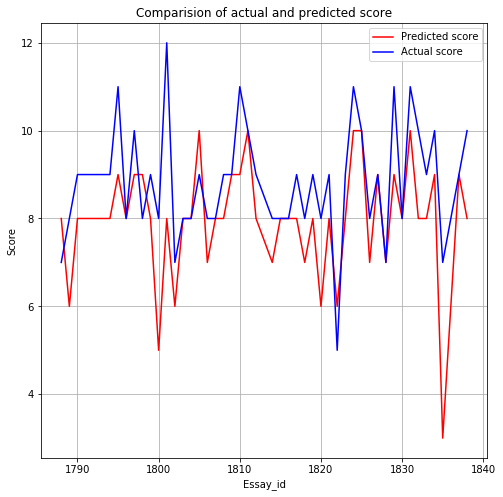

In [244]:
plt.figure(figsize=[8,8])
plt.title("Comparision of actual and predicted score")
plt.plot(df1_test['essay_id'][:50],labels_pred1[:50], color = 'red',label = 'Predicted score')
plt.plot(df1_test['essay_id'][:50],valid_score1['predicted_score'][:50] , color = 'blue' , label = 'Actual score')
plt.ylabel("Score")
plt.xlabel("Essay_id")
plt.legend()
plt.grid()
plt.show()

